In [23]:
# Gold rate prediction

### import required packages

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data set

In [25]:
df = pd.read_csv('../Database/gold_rate.csv')

### EDA 

In [26]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [27]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6002,2024-08-02,2444.000000,2477.000000,2416.000000,2425.699951,2425.699951,550
6003,2024-08-05,2442.000000,2449.800049,2367.399902,2401.699951,2401.699951,334
6004,2024-08-06,2414.500000,2421.800049,2380.000000,2389.100098,2389.100098,163
6005,2024-08-07,2392.199951,2401.000000,2384.500000,2390.500000,2390.500000,163
6006,2024-08-08,2422.800049,2467.899902,2420.199951,2467.399902,2467.399902,174252


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6007 non-null   object 
 1   Open       6007 non-null   float64
 2   High       6007 non-null   float64
 3   Low        6007 non-null   float64
 4   Close      6007 non-null   float64
 5   Adj Close  6007 non-null   float64
 6   Volume     6007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 328.6+ KB


In [29]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,1137.019777,1142.683270,1131.092942,1136.949026,1136.949026,4326.952222
std,553.883724,556.971948,550.729784,553.876291,553.876291,24494.522226
min,255.000000,256.100006,255.000000,255.100006,255.100006,0.000000
25%,625.950012,628.000000,623.549988,625.750000,625.750000,20.000000
50%,1227.800049,1234.000000,1223.000000,1228.500000,1228.500000,105.000000
75%,1585.899963,1595.700012,1575.849976,1587.450012,1587.450012,397.000000
max,2472.899902,2477.000000,2454.800049,2467.399902,2467.399902,386334.000000


In [30]:
df.drop(columns=['Date'],axis=1).corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999898,0.999858,0.999788,0.999788,0.053057
High,0.999898,1.000000,0.999808,0.999880,0.999880,0.052108
Low,0.999858,0.999808,1.000000,0.999907,0.999907,0.053821
Close,0.999788,0.999880,0.999907,1.000000,1.000000,0.052872
Adj Close,0.999788,0.999880,0.999907,1.000000,1.000000,0.052872
Volume,0.053057,0.052108,0.053821,0.052872,0.052872,1.000000


### split the data into X and Y

In [31]:
# Define explanatory variables
df['S_3'] = df['Close'].rolling(window=3).mean()
df['S_9'] = df['Close'].rolling(window=9).mean()
df['next_day_price'] = df['Close'].shift(-1)

df = df.dropna()
x = df[['S_3', 'S_9']]

# Define dependent variable
y = df['next_day_price']

### split the data into train and test set

In [32]:
# Split the data into train and test dataset
t = .8
t = int(t*len(df))

# Train dataset
x_train = x[:t]
y_train = y[:t]

# Test dataset
x_test = x[t:]
y_test = y[t:]

In [33]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123456)

### model training

In [34]:
from sklearn.linear_model import LinearRegression

# create the model
model = LinearRegression()

# train the model
model.fit(x_train, y_train)

LinearRegression()

### model evaluation

In [35]:
# get the predicted data
y_pred = model.predict(x_test)

# getting the true values
y_true = y_test

In [36]:
from sklearn.metrics import mean_absolute_error

# mean absolute error (MAE)
mae = mean_absolute_error(y_true, y_pred)
mae

16.84885108919708

In [37]:
from sklearn.metrics import mean_squared_error

# mean squared error (MSE)
mse = mean_squared_error(y_true, y_pred)
mse

524.2770027503433

In [38]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_true, y_pred)
rmse

22.89709594578193

In [39]:
rmse = np.sqrt(mse)
rmse

22.89709594578193

In [40]:
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_true, y_pred)
r2

0.9862080543376217

### result visualization

In [41]:
mean_values = np.ones(y.size) * y.mean()
mean_values

array([1138.24279713, 1138.24279713, 1138.24279713, ..., 1138.24279713,
       1138.24279713, 1138.24279713])

In [42]:
# from sklearn.decomposition import PCA

# #create pca object
# pca = PCA(n_components=1)

# x_train_new = pca.fit_transform(x_train)

# from sklearn.linear_model import LinearRegression

# model = LinearRegression()
# model.fit(x_train_new, y_train)

# # create new feature for testing
# x_test_new = pca.fit_transform(x_test)

# plt.scatter(x_test_new, y_test)
# plt.plot(x_test_new, model.predict(x_test_new), color='blue')
# plt.ylabel('Price')
# #plt.legend()

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.20 * 9 Days Moving Average (x2) + 0.96 (constant)


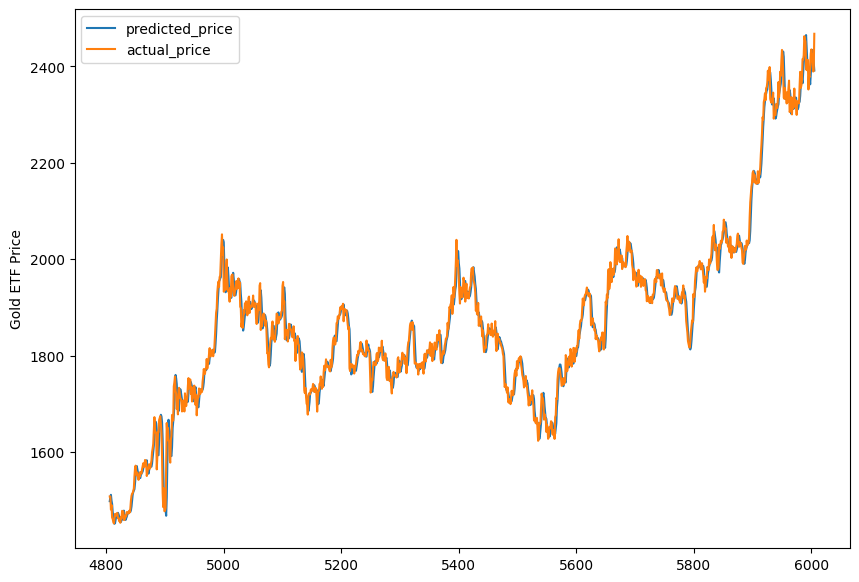

In [43]:
# Create a linear regression model
linear = LinearRegression().fit(x_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))
# Predicting the Gold ETF prices
predicted_price = linear.predict(x_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [44]:
# # Create a linear regression model
# linear = LinearRegression().fit(x_train, y_train)
# print("Linear Regression model")
# print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
# + %.2f * 9 Days Moving Average (x2) \
# + %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))
# # Predicting the Gold ETF prices
# predicted_price = linear.predict(x_test)
# predicted_price = pd.DataFrame(
#     predicted_price, index=y_test.index, columns=['price'])
# #predicted_price.plot(figsize=(10, 7))
# plt.scatter(x_test_new, y_test)
# plt.plot(x_test_new, model.predict(x_test_new), color='blue')
# #plt.plot(predicted_price, color='blue')
# plt.legend(['predicted_price', 'actual_price'])
# plt.ylabel("Gold ETF Price")
# plt.show()